In [6]:
pip install scikit-mlm

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install --upgrade scikit-learn


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import re 

In [2]:
# Load your dataset
data = pd.read_csv('dataset.csv',low_memory=False)

# Removing anonymous and indicative features
anonymous_indicative_features = ['course_id_DI', 'userid_DI']
data.drop(columns=anonymous_indicative_features, inplace=True)

# Handling missing values before conversion
data.dropna(subset=['expected_hours_week'], inplace=True)

# Convert 'expected_hours_week' to numeric
def extract_numeric_hours(value):
    # Extract numeric information from the string
    numeric_value = re.findall(r'\d+', value)
    if numeric_value:
        return float(numeric_value[0])
    else:
        return None

data['expected_hours_week'] = data['expected_hours_week'].apply(extract_numeric_hours)

# Drop rows with missing values after conversion
data.dropna(inplace=True)

# Encoding nominal features
nominal_features = ['discipline', 'primary_reason', 'learner_type', 'LoE_DI']
for feature in nominal_features:
    label_encoder = LabelEncoder()
    data[feature] = label_encoder.fit_transform(data[feature])

# Normalizing features
features_to_normalize = ['expected_hours_week', 'course_length', 'nevents', 'ndays_act', 'ncontent', 'nforum_posts']
scaler = MinMaxScaler()
data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

# Features to keep
X = data[['discipline', 'registered', 'explored', 'grade', 'grade_reqs', 'completed_%', 
          'course_reqs', 'primary_reason', 'learner_type', 'expected_hours_week', 
          'LoE_DI','nevents', 'ndays_act', 
          'ncontent', 'nforum_posts', 'course_length']]


# Set 'viewed' as the target value
y = data['viewed']
data.drop(columns=['viewed'], inplace=True)

In [3]:
data

,discipline,registered,explored,grade,grade_reqs,completed_%,course_reqs,primary_reason,learner_type,expected_hours_week,LoE_DI,nevents,ndays_act,ncontent,nforum_posts,course_length
24,1,1,0,0.000,1,0.067,1,5,1,0.142857,0,0.008684,0.142857,0.311828,0.015873,0.003448
26,5,1,0,0.828,1,0.158,1,5,6,0.000000,0,0.009037,0.142857,1.000000,0.000000,0.100000
27,1,1,0,0.000,1,0.027,1,5,4,0.142857,0,0.001763,0.032967,0.075269,0.031746,0.003448
29,1,1,0,0.000,1,0.013,1,4,2,0.142857,0,0.001670,0.010989,0.000000,0.000000,0.003448
31,1,1,0,0.000,1,0.067,1,4,1,0.142857,0,0.005307,0.043956,0.311828,0.000000,0.003448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324108,5,1,0,0.547,1,0.083,1,4,0,0.428571,1,0.001763,0.054945,1.000000,0.047619,0.020690
324259,5,1,0,0.000,1,0.032,1,4,1,0.142857,3,0.001058,0.021978,0.526882,0.000000,0.100000
324378,5,1,0,0.168,1,0.035,1,4,1,0.000000,3,0.002820,0.065934,0.182796,0.111111,0.244828
324901,5,1,0,0.475,1,0.083,1,10,2,0.000000,4,0.005752,0.032967,1.000000,0.000000,0.020690


In [4]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(y_test)
print(y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# If you want to print the coefficients and intercept:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


23409    1
8448     1
1421     1
16410    1
17064    1
        ..
6888     1
8491     1
20085    1
10390    1
16785    1
Name: viewed, Length: 278, dtype: int64
[0.99872153 1.00052503 0.99687567 1.00188915 0.99720671 0.99640475
 0.99961052 0.99938714 0.99619641 1.00063151 1.00074998 0.99814781
 0.99474514 0.99852745 0.99662792 0.99801864 0.99840414 0.99797308
 0.99885952 0.99575232 0.99587515 0.99753293 0.99667587 1.00303487
 0.99390685 0.99919077 1.00214763 1.0012136  1.00049964 0.99729315
 0.99665965 1.00203115 0.99963165 1.00061754 1.00209984 1.00036326
 1.00169928 0.99682327 0.99451135 1.00050018 1.00138962 1.00103569
 0.99848247 0.99772104 0.99779438 0.99463077 0.99775053 0.99635194
 1.00124074 0.99849345 1.0036298  1.00282582 0.99698574 0.99454748
 0.99867592 1.0004063  0.99759902 0.99558192 0.99593266 0.9994214
 0.99206321 0.99912476 0.99630821 0.99676203 1.00115724 1.00135293
 1.00042103 0.99370433 1.0017007  0.99811688 0.99293009 1.00046919
 0.99685407 1.00072726 1.00195828 1.

In [6]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logistic)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

# If you want to print the coefficients and intercept:
print("Coefficients:", logistic_model.coef_)
print("Intercept:", logistic_model.intercept_)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       278

    accuracy                           1.00       278
   macro avg       1.00      1.00      1.00       278
weighted avg       1.00      1.00      1.00       278

Confusion Matrix:
[[278]]
Coefficients: [[-0.56457904  0.01860456  0.02927537 -0.02533437  0.01860456  0.01689584
   0.01860456  0.14930201 -0.51896753 -0.20545744 -0.0549134   0.00611368
   0.08326588 -0.2542707   0.0391464   0.02097162]]
Intercept: [10.27656256]


C:\Users\dell\Desktop\Mini project\myenv\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [7]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the model
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print("Decision Tree Regressor - Mean Squared Error:", mse_decision_tree)
print("Decision Tree Regressor - R-squared:", r2_decision_tree)


Decision Tree Regressor - Mean Squared Error: 0.0
Decision Tree Regressor - R-squared: 1.0


In [8]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate the model
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print("Random Forest Regressor - Mean Squared Error:", mse_random_forest)
print("Random Forest Regressor - R-squared:", r2_random_forest)


Random Forest Regressor - Mean Squared Error: 0.0
Random Forest Regressor - R-squared: 1.0


In [9]:
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

# Initialize the AdaBoost Regressor model
adaboost_model = AdaBoostRegressor(random_state=42)

# Fit the model on the training data
adaboost_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the model
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)

print("AdaBoost Regressor - Mean Squared Error:", mse_adaboost)
print("AdaBoost Regressor - R-squared:", r2_adaboost)

AdaBoost Regressor - Mean Squared Error: 0.0
AdaBoost Regressor - R-squared: 1.0


In [10]:
# Dictionary to store performance metrics of each regressor
performance_metrics = {}

# Linear Regression
performance_metrics['Linear Regression'] = {'MSE': mse, 'R-squared': r2}

# Logistic Regression
performance_metrics['Logistic Regression'] = {'Accuracy': accuracy}

# Decision Tree Regressor
performance_metrics['Decision Tree Regressor'] = {'MSE': mse_decision_tree, 'R-squared': r2_decision_tree}

# Random Forest Regressor
performance_metrics['Random Forest Regressor'] = {'MSE': mse_random_forest, 'R-squared': r2_random_forest}

# AdaBoost Regressor
performance_metrics['AdaBoost Regressor'] = {'MSE': mse_adaboost, 'R-squared': r2_adaboost}

# Print the performance metrics
for regressor, metrics in performance_metrics.items():
    print(f"{regressor}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

# Find the best regressor based on R-squared or Accuracy
best_regressor = max(performance_metrics, key=lambda x: performance_metrics[x]['R-squared'] if 'R-squared' in performance_metrics[x] else performance_metrics[x]['Accuracy'])

print(f"The best regressor is: {best_regressor}")


Linear Regression:
MSE: 3.642380935398059e-05
R-squared: 0.0

Logistic Regression:
Accuracy: 1.0

Decision Tree Regressor:
MSE: 0.0
R-squared: 1.0

Random Forest Regressor:
MSE: 0.0
R-squared: 1.0

AdaBoost Regressor:
MSE: 0.0
R-squared: 1.0

The best regressor is: Logistic Regression


C:\Users\dell\Desktop\Mini project\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


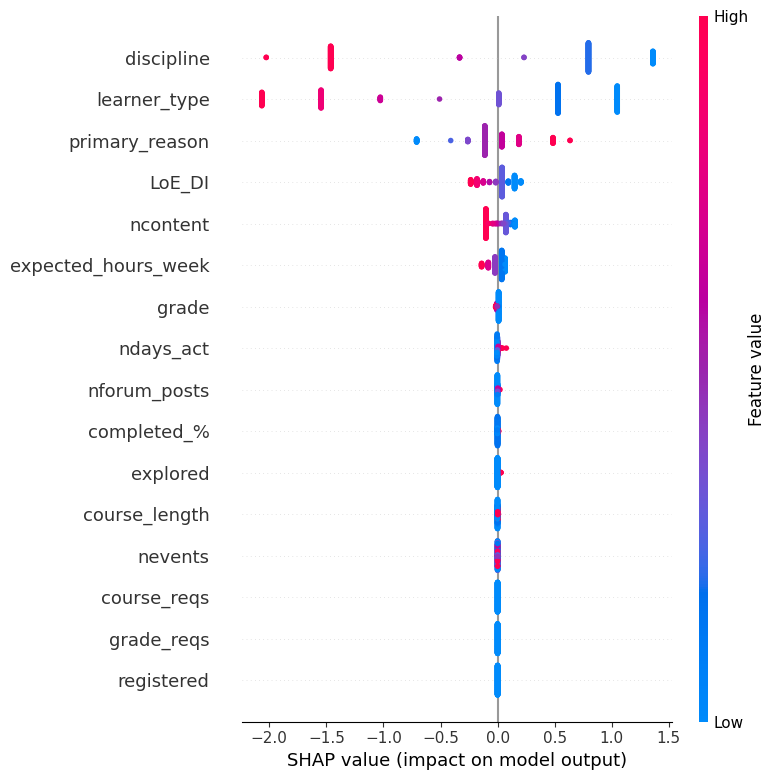

Factors influencing online learning performance:
discipline: 1.125421299802231
learner_type: 1.0037354756359445
primary_reason: 0.18394222763275142
LoE_DI: 0.10203620513368958
ncontent: 0.09573222025734521
expected_hours_week: 0.04815474820471795
grade: 0.008021936820751956
ndays_act: 0.004628369332527693
nforum_posts: 0.0018467249405438872
completed_%: 0.0012264966642809392
explored: 0.000989886579049674
course_length: 0.0008505394536580521
nevents: 4.715820344160532e-05
registered: 0.0
grade_reqs: 0.0
course_reqs: 0.0


In [11]:
import shap
import numpy as np  # Add this line to import NumPy

# Initialize the explainer with the logistic regression model and the training data
explainer = shap.Explainer(logistic_model, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)

# Create a dictionary to map feature names to mean absolute SHAP values
feature_importance = dict(zip(X_test.columns, mean_abs_shap_values))

# Sort the feature importance dictionary by values in descending order
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Print the feature influencing online learning performance
print("Factors influencing online learning performance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")


Distribution of cluster labels:
cluster_label
0    117
2     94
1     67
Name: count, dtype: int64


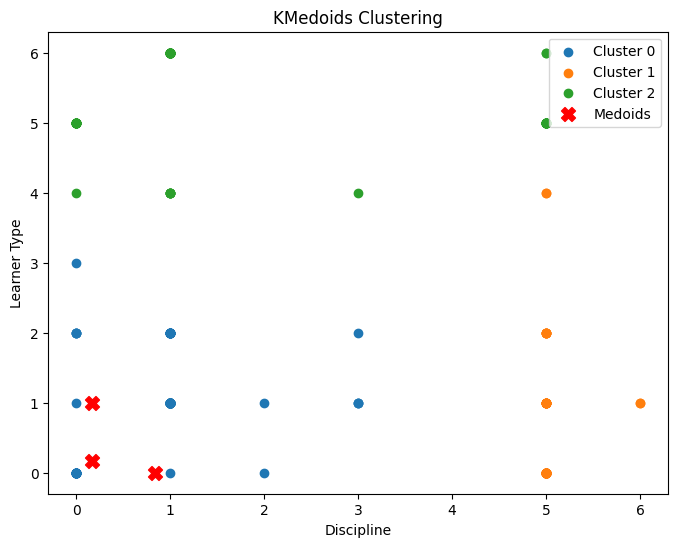

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def kmedoids(X, n_clusters, max_iter=100):
    n_samples, n_features = X.shape

    # Initialize medoids randomly
    medoid_indices = np.random.choice(n_samples, size=n_clusters, replace=False)
    medoids = X[medoid_indices]

    for _ in range(max_iter):
        # Assign each sample to the nearest medoid
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - medoids, axis=2), axis=1)

        # Update medoids
        new_medoids = np.empty_like(medoids)
        for i in range(n_clusters):
            cluster_samples = X[labels == i]
            distances = np.linalg.norm(cluster_samples[:, np.newaxis] - cluster_samples, axis=2)
            total_distance = np.sum(distances, axis=1)
            new_medoids[i] = cluster_samples[np.argmin(total_distance)]

        # If no change in medoids, break
        if np.all(medoids == new_medoids):
            break

        medoids = new_medoids

    return labels, medoids

# Features influencing online learning performance
features_influencing_performance = ['discipline', 'learner_type']

# Prepare data for clustering
X_cluster = X_test[features_influencing_performance].values

# Normalize the data for better clustering results
scaler = MinMaxScaler()
X_cluster_normalized = scaler.fit_transform(X_cluster)

# Initialize KMedoids clustering
n_clusters = 3  # You can adjust this based on your preference
cluster_labels, medoids = kmedoids(X_cluster_normalized, n_clusters)

# Assign cluster labels to the subset of data used for clustering (X_test)
X_test['cluster_label'] = cluster_labels

# View the distribution of cluster labels
print("Distribution of cluster labels:")
print(X_test['cluster_label'].value_counts())

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_data = X_cluster[cluster_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

# Plot the medoids
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='X', s=100, label='Medoids')

plt.title('KMedoids Clustering')
plt.xlabel('Discipline')
plt.ylabel('Learner Type')
plt.legend()
plt.show()
